In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Churn Prediction
### D.V-> churn->Y or N-> Classification

In [3]:
df=pd.read_csv("Telco_Customer_Churn (1).csv")

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5456,8718-PTMEZ,Female,0,No,No,13,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,31.05,347.25,Yes
3265,9722-UJOJR,Male,0,Yes,Yes,29,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,Yes
1841,8958-JPTRR,Female,0,Yes,No,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.30,1261.7,No
4255,2157-MXBJS,Male,0,Yes,No,13,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Mailed check,75.30,989.45,Yes
6919,5136-GFPMB,Male,0,No,No,54,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),89.40,4869.5,No


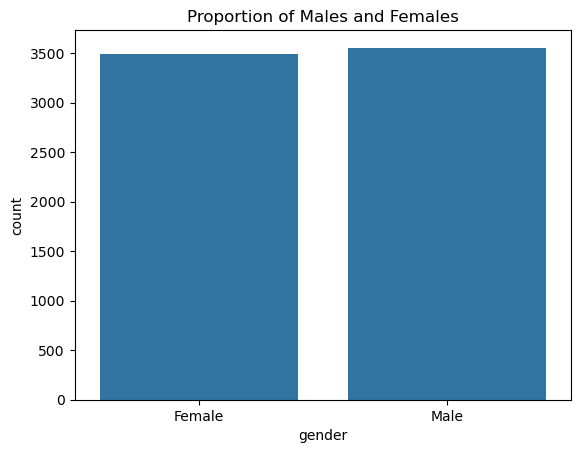

In [5]:
sns.countplot(x='gender', data=df)
plt.title('Proportion of Males and Females')
plt.show()

In [6]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [7]:
import warnings
warnings.filterwarnings("ignore")

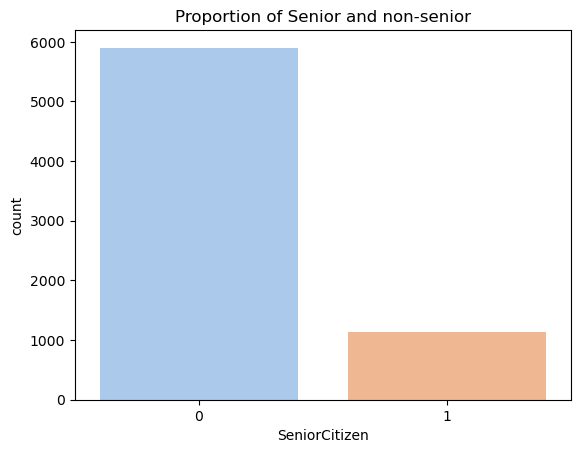

In [8]:
sns.countplot(x='SeniorCitizen', data=df,palette="pastel")
plt.title('Proportion of Senior and non-senior')
plt.show()

<Axes: xlabel='Dependents', ylabel='count'>

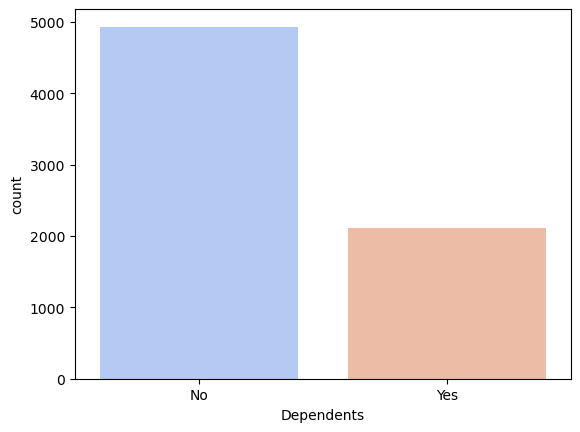

In [9]:
### Dependents distribution
sns.countplot(x='Dependents', data=df, palette='coolwarm')

<Axes: xlabel='gender', ylabel='count'>

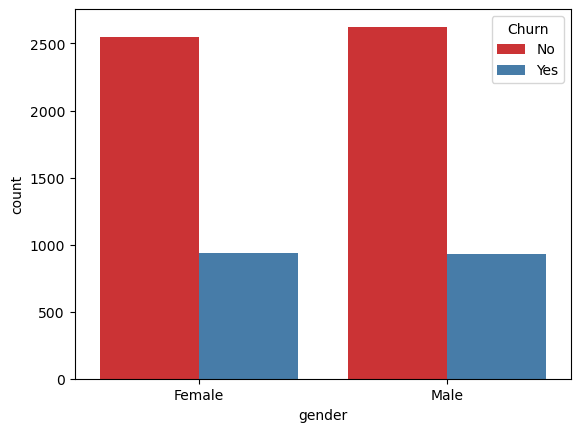

In [10]:
sns.countplot(x='gender',hue="Churn", data=df, palette='Set1')

<Axes: xlabel='Churn', ylabel='count'>

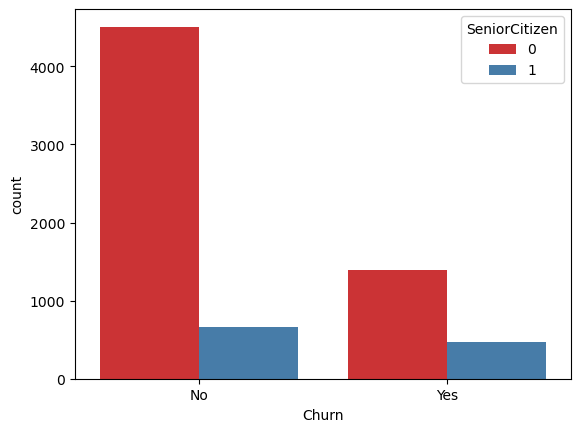

In [11]:
sns.countplot(x='Churn',hue="SeniorCitizen", data=df, palette='Set1')

<Axes: xlabel='Churn', ylabel='count'>

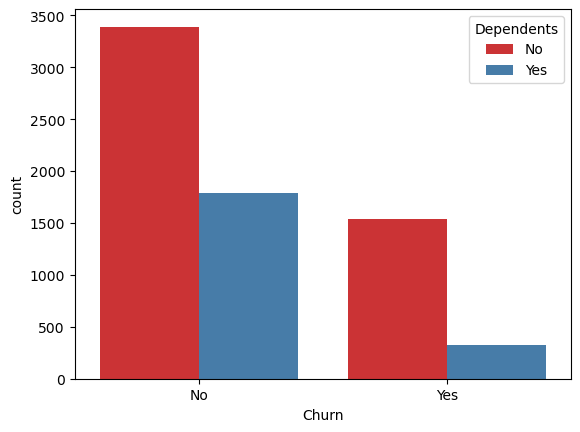

In [12]:
sns.countplot(x='Churn',hue="Dependents", data=df, palette='Set1')

<Axes: >

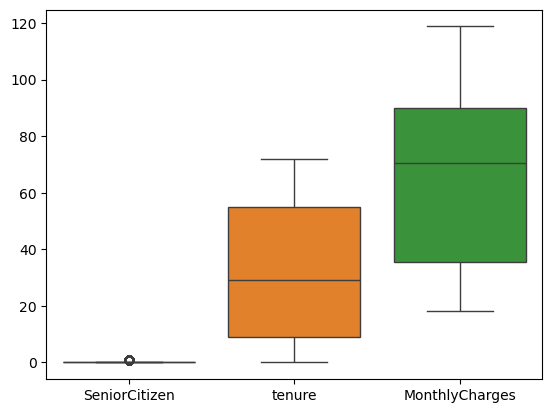

In [13]:
sns.boxplot(data=df)

<Axes: >

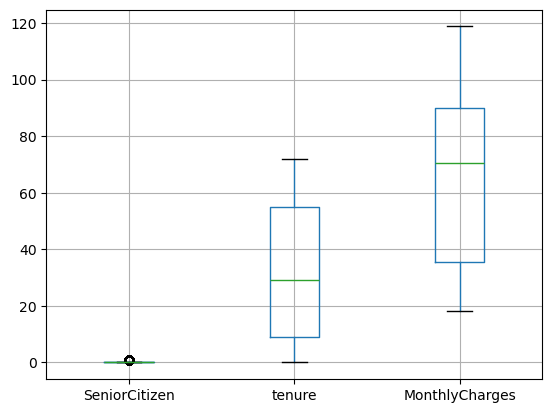

In [14]:
df.boxplot()

In [15]:
### Drop customerid column
df=df.drop("customerID",axis=1)

In [16]:
df.shape

(7043, 20)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the encoded DataFrame
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [20]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
y=df[["Churn"]]
x=df.drop("Churn",axis=1)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [24]:
from sklearn.linear_model import LogisticRegression # solver(80%)
from sklearn.neighbors import KNeighborsClassifier# n_neighbors,p
from sklearn.svm import SVC #kernel,c ,gamma
from sklearn.tree import DecisionTreeClassifier#max depth,sample split,leaf
from sklearn.ensemble import BaggingClassifier#estimators,criterion
from sklearn.ensemble import AdaBoostClassifier#estimators,criterion
from sklearn.ensemble import GradientBoostingClassifier#estimators,criterion
from sklearn.ensemble import RandomForestClassifier#estimators,criterion,max features

In [25]:
model_rfc=RandomForestClassifier(n_estimators=100,min_samples_split=0.01)
model_rfc.fit(x_train,y_train)
print(model_rfc.score(x_train,y_train))
print(model_rfc.score(x_test,y_test))

0.8298174442190669
0.8135352579271179


In [34]:
model_svc=SVC(kernel="rbf" ,C=3)
model_svc.fit(x_train,y_train)
print(model_svc.score(x_train,y_train))
print(model_svc.score(x_test,y_test))

0.7279918864097363
0.7501183151916706


In [68]:
model_bgc=BaggingClassifier(n_estimators=100,max_samples=0.08,max_features=10)
model_bgc.fit(x_train,y_train)
print(model_bgc.score(x_train,y_train))
print(model_bgc.score(x_test,y_test))

0.8294117647058824
0.8121154756270705


#### Logistic Regression->80,81
#### KNN->77,78
#### SVC->72,75
#### DTC->78%
#### GBC->82,81
#### RFC->82,81
#### Bagging->82,81
#### ABC->81,80

### Bagging? GBC ? RFC->?

In [69]:
predictions_rfc=model_rfc.predict(x_test)

In [72]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [73]:
conf_rfc=ConfusionMatrixDisplay(confusion_matrix(y_test,predictions_rfc))

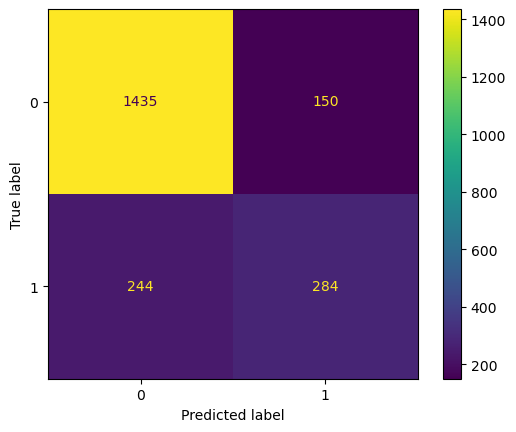

In [74]:
conf_rfc.plot()

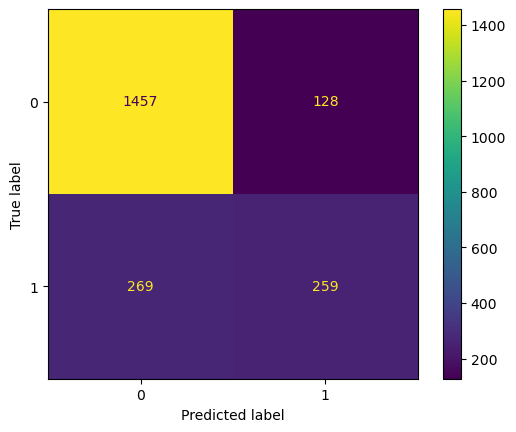

In [86]:
predictions_bgc=model_bgc.predict(x_test)
conf_bgc=ConfusionMatrixDisplay(confusion_matrix(y_test,predictions_bgc))
conf_bgc.plot()

In [75]:
7043*0.3=>2113

2112.9

In [76]:
1435+150+244+284

2113

In [77]:
acc=>(TP+TN)/all->(284+1435)/2113

0.8135352579271179

In [78]:
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1585
           1       0.65      0.54      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.81      2113



In [87]:
print(classification_report(y_test,predictions_bgc))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1585
           1       0.67      0.49      0.57       528

    accuracy                           0.81      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.80      0.81      0.80      2113



In [79]:
284/(284+244)

0.5378787878787878

In [80]:
1435/(1435+150)

0.9053627760252366

In [84]:
(2*0.91*0.85)/(0.91+0.85)

0.8789772727272727

In [81]:
284/(284+150)

0.6543778801843319

In [82]:
1435/(1435+244)

0.8546754020250149